In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(230)

### Import data - Load MNIST Train and Test datasets 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Training data type: %s;\nTraining data shape: %s" % (x_train.dtype, x_train.shape))
print("\nTest data type: %s;\nTest data shape: %s" % (x_test.dtype, x_test.shape))

Training data type: uint8;
Training data shape: (60000, 28, 28)

Test data type: uint8;
Test data shape: (10000, 28, 28)


### Preprocess data

In [4]:
def preprocess_features(x, y):
    x = tf.cast(x, tf.float32)/255.0
    y = tf.cast(y, tf.int64)
    return x, y

def preprocess(x, y, mode="train"):
    ds = tf.data.Dataset.from_tensor_slices((x, y))
    ds = ds.map(preprocess_features)
    if mode == "train":
        ds = ds.shuffle(10000)
    ds = ds.batch(256).prefetch(1)
    return ds

In [5]:
train_ds = preprocess(x_train, y_train)
val_ds = preprocess(x_test, y_test, "test")

### Define Model

In [23]:
class Model(tf.keras.Model):

    def __init__(self):
        super().__init__()
        
        self.model_layers = []
        self.model_layers.append(tf.keras.layers.Reshape(target_shape=(28,28,1), input_shape=(28,28)))
        self.model_layers.append(tf.keras.layers.Conv2D(32, kernel_size=5, activation=tf.nn.relu))
        self.model_layers.append(tf.keras.layers.MaxPool2D(2, strides=2))
        self.model_layers.append(tf.keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu))
        self.model_layers.append(tf.keras.layers.MaxPool2D(2, strides=2))
        self.model_layers.append(tf.keras.layers.Flatten())
        self.model_layers.append(tf.keras.layers.Dense(1024))
        self.model_layers.append(tf.keras.layers.Dropout(rate=0.5))
        self.model_layers.append(tf.keras.layers.Dense(10))
        
    def call(self, inputs, training=False):
        outputs = inputs
        for layer in self.model_layers:
            outputs = layer(inputs, training=training)
            inputs = outputs
        return outputs

In [24]:
model = Model()

### Define Loss and Optimizer

In [10]:
optimizer = tf.keras.optimizers.Adam(0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Training

#### Option 1 - Default Keras API using .compile and .fit

In [12]:
metrics = ["accuracy"]
epochs = 1

In [25]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Train for 235 steps, validate for 40 steps
Epoch 1/10
235/235 [==============================] - 105s 449ms/step - loss: 0.1873 - accuracy: 0.9444 - val_loss: 0.0424 - val_accuracy: 0.9863
Epoch 2/10
 31/235 [==>...........................] - ETA: 1:29 - loss: 0.0721 - accuracy: 0.9785

KeyboardInterrupt: 

### Visualization

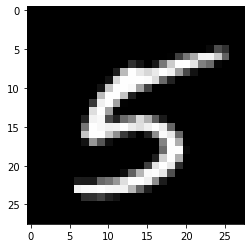

Model Prediction: 5; Correct Answer: 5


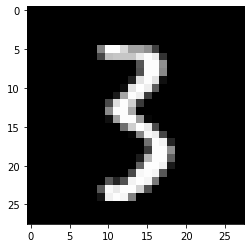

Model Prediction: 3; Correct Answer: 3


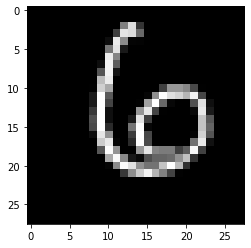

Model Prediction: 6; Correct Answer: 6


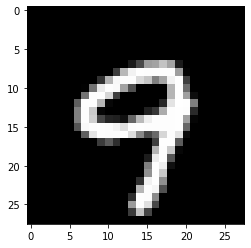

Model Prediction: 9; Correct Answer: 9


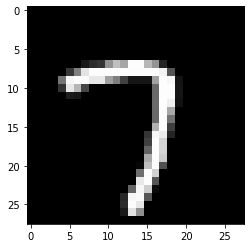

Model Prediction: 7; Correct Answer: 7


In [26]:
n_images = 5

for x, y in val_ds.take(1):
    for i in range(n_images):

        index = np.random.randint(256)
        test_image = x[index]
        predictions = model(tf.reshape(x[index], [1,28, 28]))

        plt.imshow(np.reshape(test_image, [28, 28]), cmap='gray')
        plt.show()
        print("Model Prediction: {}; Correct Answer: {}".format(np.argmax(predictions), y[index]))